# Tutorial 7 - Integration with PACKIO outputs (.paq data)

PACKIO is a software for temporal synchronization of experimental data acquisition and simultaneous hardware triggering. More information can be found at: https://github.com/apacker83/PackIO

The outputs of PACKIO is a .paq file that contains data across all channels collected.

In [1]:
import imagingplus as ip
prep = 'HF113'
date = '2021-01-31'

expobj: ip.Experiment = ip.import_obj(pkl_path=f'/mnt/qnap_share/Data/imagingplus-example/imagingplus-test-analysis/{prep}_analysis.pkl')

trialobj = expobj.load_trial(trialID=expobj.trialIDs[0])



imported imagingplus successfully
	version: 0.2-beta


|- Loaded imagingplus.Experiment object (expID: HF113)agingplus-test-analysis/HF113_analysis.pkl ... 


|- Loaded 'HF113 t-001 (TwoPhotonImagingTrial experimental object)'t-analysis/2021-01-31_t-001.pkl ... 



#### adding paqdata module to the trialobj

In [2]:
from imagingplus.processing.paq import PaqData

	loading Paq cellsdata from: /home/pshah/mnt/qnap/Data/2021-01-31/2021-01-31_HF113_001.paq


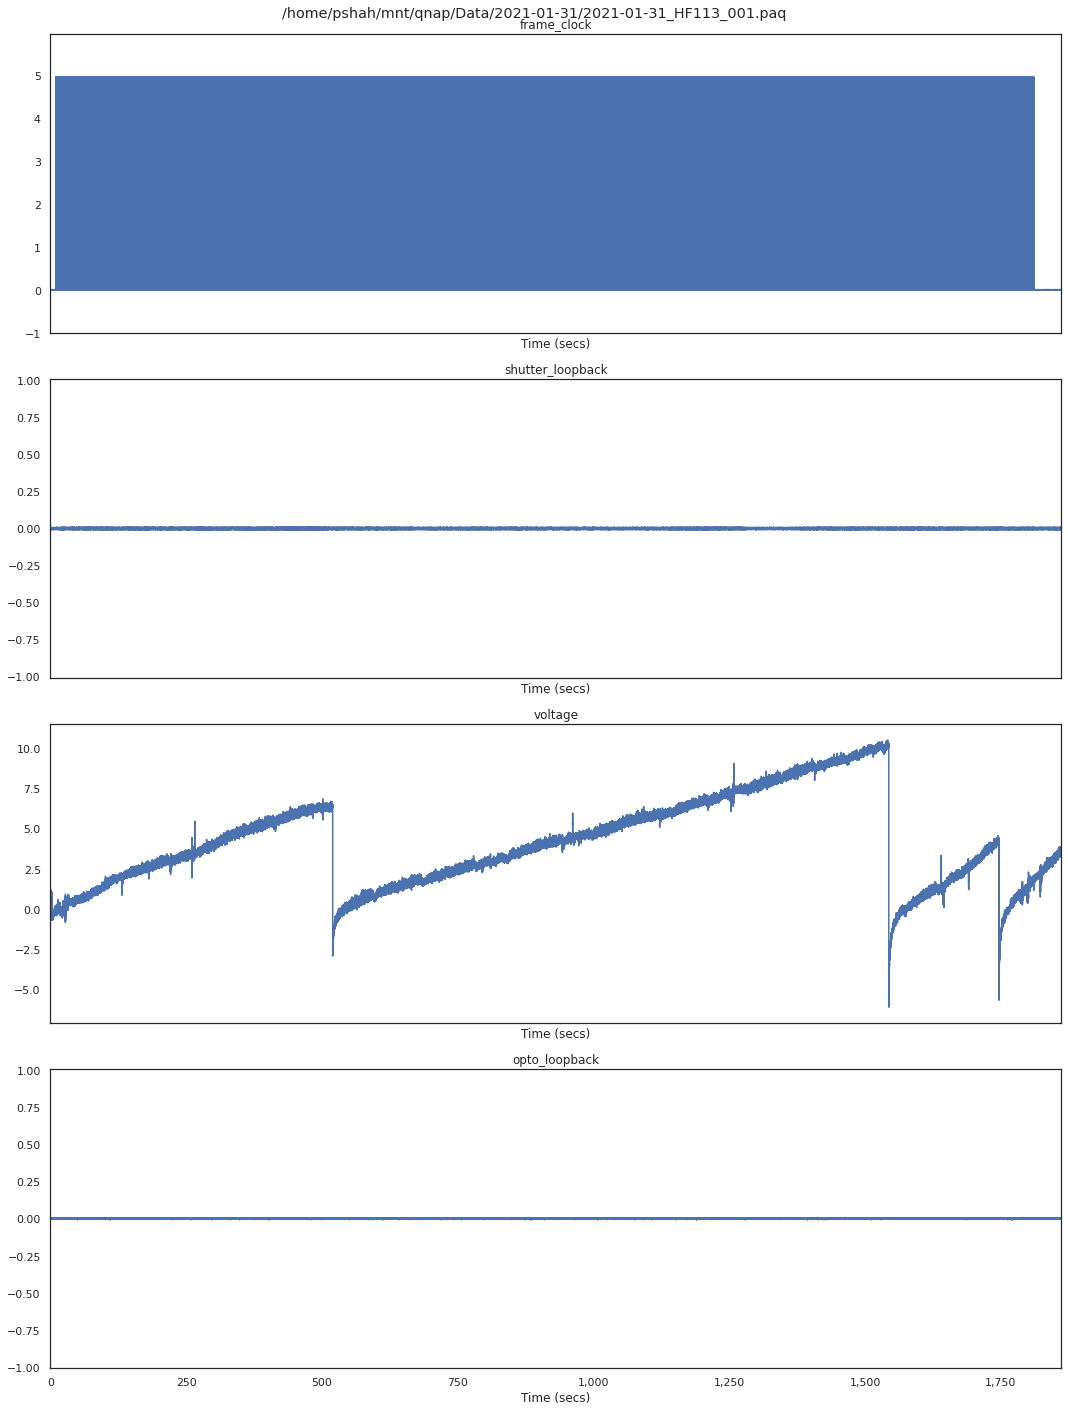

	 - loaded 4 channels from .Paq file: ['frame_clock', 'shutter_loopback', 'voltage', 'opto_loopback']

\- ADDING PAQ DATA from /home/pshah/mnt/qnap/Data/2021-01-31/2021-01-31_HF113_001.paq... 
	loading Paq cellsdata from: /home/pshah/mnt/qnap/Data/2021-01-31/2021-01-31_HF113_001.paq


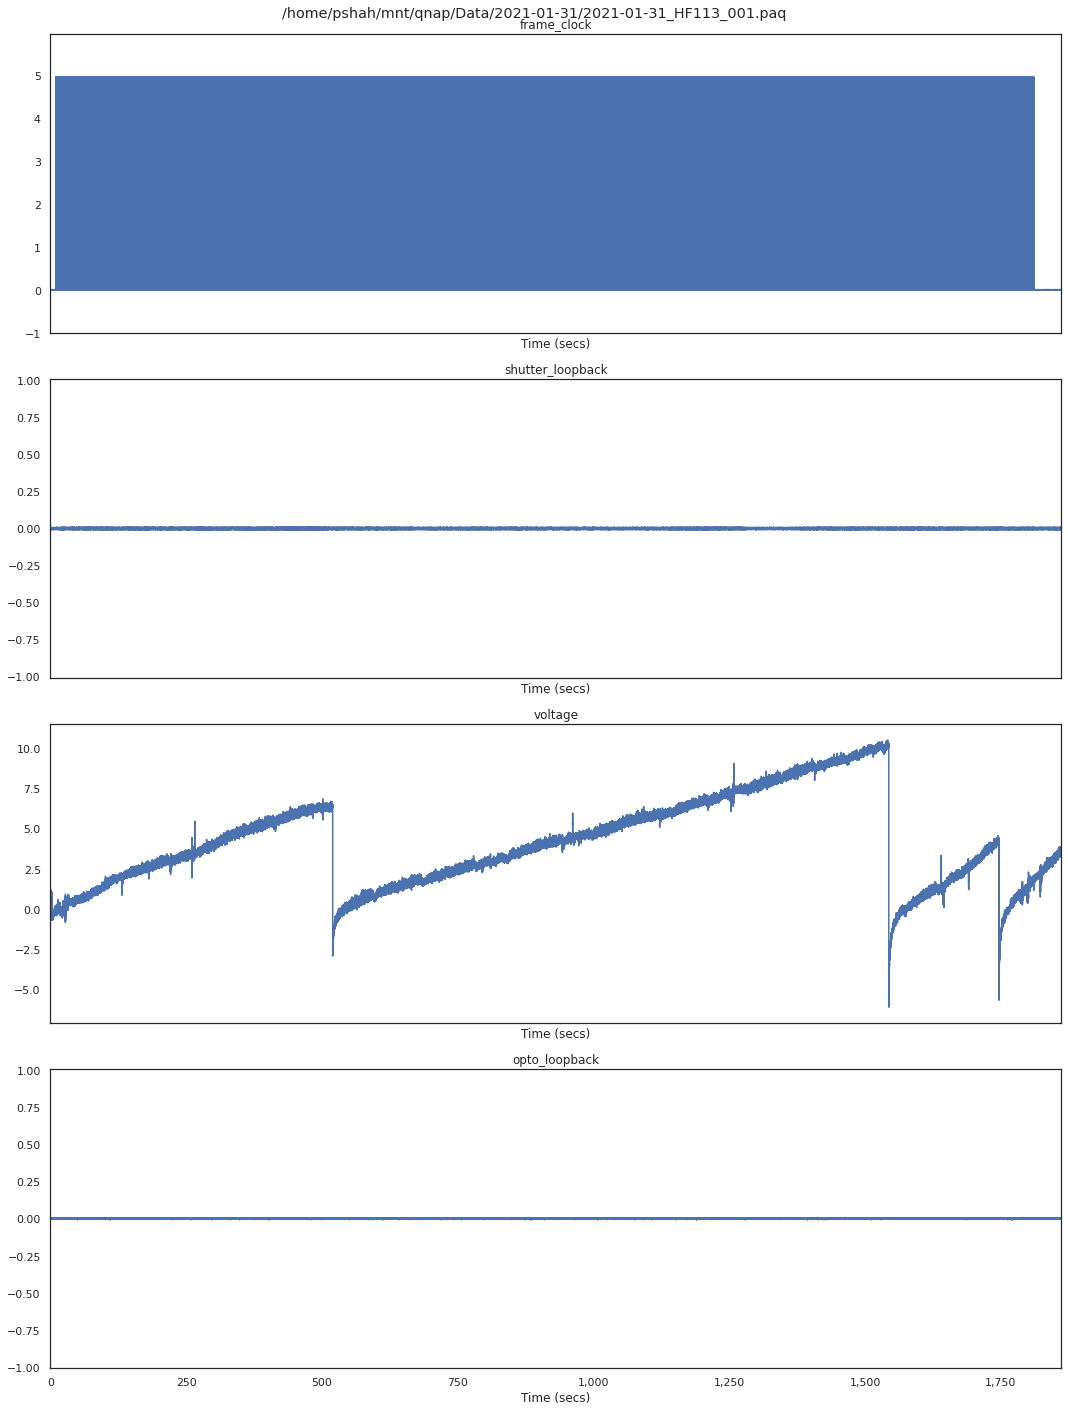

	 - loaded 4 channels from .Paq file: ['frame_clock', 'shutter_loopback', 'voltage', 'opto_loopback']
Created new TemporalData of 4 x 37223890 (sampled at 20000


In [3]:
# adding paqdata to the trialobj

paq_path = f'/home/pshah/mnt/qnap/Data/{date}/{date}_{prep}_{trialobj.trialID[-3:]}.paq'
trialobj.tmdata = PaqData.import_paqdata(file_path=paq_path, plot=True)

In [4]:
# inspect the newly created .Paq module
print(trialobj.tmdata)

imagingplus.processing.Paq.PaqData: 
	sparse_paq_data: None
	file_path: /home/pshah/mnt/qnap/Data/2021-01-31/2021-01-31_HF113_001.paq
	sampling_rate: 20000
	channels: ['frame_clock', 'shutter_loopback', 'voltage', 'opto_loopback']
	data:           frame_clock  shutter_loopback   voltage  opto_loopback
0            0.007169          0.000592  0.790818       0.000592
1            0.007498          0.000264  0.789831       0.000592
2            0.007498          0.000264  0.789502       0.000264
3            0.008156          0.000264  0.789831       0.000592
4            0.006183          0.000592  0.789502       0.000592
...               ...               ...       ...            ...
37223885     0.007169          0.000592  3.502508       0.000264
37223886     0.006512          0.000264  3.502508       0.000592
37223887     0.006841          0.000592  3.502837      -0.000065
37223888     0.006512          0.000264  3.502837       0.000264
37223889     0.007498          0.000264  3.5025

We can perform a quick plot of paq data channel for quick visualization using the `plot__channel()` function from the `plotting` submodule.

In [5]:
print(trialobj.tmdata.channels)

['frame_clock', 'shutter_loopback', 'voltage', 'opto_loopback']


\- executing plotting function: plot__channel


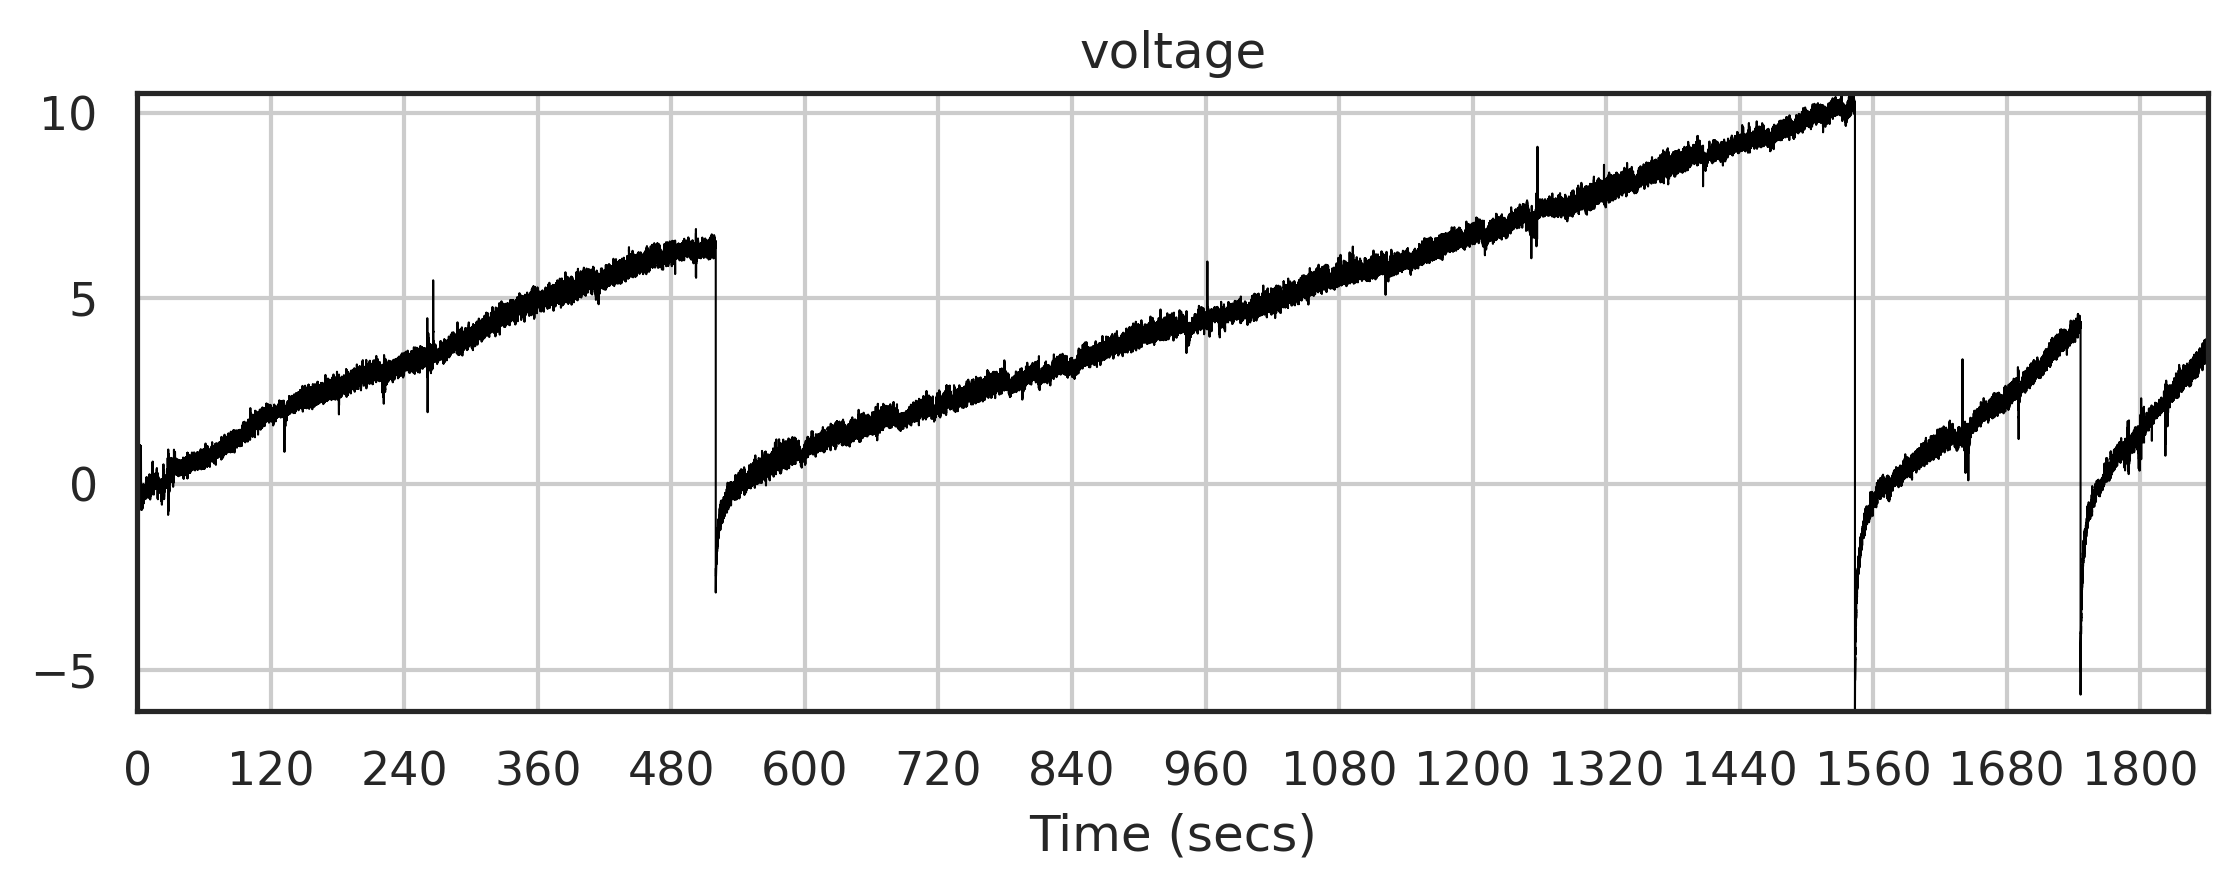

In [6]:
# plot paq channel data
ip.plotting.plot__channel(tmdata= trialobj.tmdata, channel='voltage', x_axis='Time (secs)', x_tick_secs=120,
                         figsize=(8,3))

#### Processing paq data

In this paq data, one of the channels recorded the microscope imaging frame clock. We can retrieve these frame clock times to retrieve the paq clock timestamps when the imaging period began and finished.

In [7]:
# finding frame times of imaging from the frame clock channel ("frame_clock").

trialobj.tmdata.frame_times = trialobj.tmdata.getPaqFrameTimes(frame_times_channel='frame_clock')



	\- Retrieving two-photon imaging frame times from .paq channel: frame_clock ... 


In [ ]:
# crop all channels in paq data to the start and finish of the imaging period within the trial.
trialobj.tmdata.cropData(begin=trialobj.tmdata.frame_times[0], end=trialobj.tmdata.frame_times[-1], channels='all')

In [ ]:
# plot to confirm that the cropping executed as expected
ip.plotting.plot__channel(trialobj.tmdata, channel='voltage', x_axis='Time (secs)', x_tick_secs=120)

#### Synchronizing .paq data with imaging frames

Since, imaging is generally performed at multiple orders of magnitude slower data collection speed, we have provided the `get_sparse_paq()` method in the .Paq module to collect paq data from channels at timepoints synchronized with only the imaging frames (found under `.Paq.frame_times`.

In [ ]:
trialobj.tmdata.get_sparse_paq(frame_clock=trialobj.Paq.frame_times)